# Module import

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# Matplotlib font setting for Hangul

In [3]:
## 폰트 확인
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if 'Gothic' in f.name or 'Apple' in f.name or 'Nanum' in f.name:
        print(f.name)

AppleMyungjo
Tsukushi B Round Gothic
Apple Braille
Apple Symbols
Apple Braille
Apple LiGothic
Nanum Myeongjo
Toppan Bunkyu Midashi Gothic
Apple Braille
Tsukushi A Round Gothic
Toppan Bunkyu Gothic
Hiragino Maru Gothic Pro
Nanum Gothic
Apple LiSung
YuGothic
Nanum Brush Script
AppleGothic
Apple Braille
Apple Chancery
BIZ UDGothic
Apple SD Gothic Neo
Noto Sans Gothic
Apple Braille
YuGothic


In [4]:
# 나눔고딕 설치 후(필요시), 아래처럼 사용
plt.rcParams['font.family'] = 'Nanum Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Survey Analysis - Phonetic Convergence

In [87]:
excel_path = os.path.join(Path.home(), 'Desktop', 'results', 'survey.xlsx')
excel_file = pd.ExcelFile(excel_path)
excel_file.sheet_names


['Sheet1', '설문지 응답 시트', '설문지 응답 시트1 (_backup)']

In [88]:
excel_sheet = excel_file.parse(sheet_name='설문지 응답 시트')
excel_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   타임스탬프                                      56 non-null     datetime64[ns]
 1   1. 참가자 번호                                  56 non-null     object        
 2   2. (2, 3 단계)에서 들으신 발음을 한 주체는 누구입니까?        56 non-null     object        
 3   3. (2, 3단계)에서 들으신 발음을 듣고 어떠한 인상이 느껴지셨습니까?  55 non-null     float64       
 4   4. (2, 3단계)에서 들으신 발음을 듣고 어떠한 인상이 느껴지셨습니까?  53 non-null     float64       
 5   list                                       56 non-null     int64         
 6   성별                                         56 non-null     object        
 7   분석대상 여부                                    56 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 3.6+ KB


In [89]:
excel_sheet = excel_sheet[excel_sheet['분석대상 여부'] == 1].reset_index(drop=True)
excel_sheet.head()

,타임스탬프,1. 참가자 번호,"2. (2, 3 단계)에서 들으신 발음을 한 주체는 누구입니까?","3. (2, 3단계)에서 들으신 발음을 듣고 어떠한 인상이 느껴지셨습니까?","4. (2, 3단계)에서 들으신 발음을 듣고 어떠한 인상이 느껴지셨습니까?",list,성별,분석대상 여부
0,2025-04-03 15:07:08.523,LY019,AI,6.0,4.0,1,남,1
1,2025-04-03 18:24:22.639,LY011,사람,5.0,5.0,2,여,1
2,2025-04-03 19:58:42.765,LY007,AI,3.0,5.0,1,남,1
3,2025-04-04 11:27:51.271,LY022,사람,1.0,6.0,2,여,1
4,2025-04-04 14:03:22.407,LY002,AI,2.0,6.0,1,여,1


In [90]:
excel_sheet.columns = ['Timestamp', 'Participant_id','Model_Humanness', 'AI_Like', 'Human_Like', 'List_Truth', 'Participant_Gender', 'Analysis_Target']
excel_sheet['Correctness_Humanness_Perception'] = [1 if ((value['Model_Humanness'] == 'AI' and value['List_Truth'] == 1) or (value['Model_Humanness'] == '사람' and value['List_Truth'] == 2)) else 0 for idx, value in excel_sheet.iterrows()]
excel_sheet

,Timestamp,Participant_id,Model_Humanness,AI_Like,Human_Like,List_Truth,Participant_Gender,Analysis_Target,Correctness_Humanness_Perception
0,2025-04-03 15:07:08.523,LY019,AI,6.0,4.0,1,남,1,1
1,2025-04-03 18:24:22.639,LY011,사람,5.0,5.0,2,여,1,1
2,2025-04-03 19:58:42.765,LY007,AI,3.0,5.0,1,남,1,1
3,2025-04-04 11:27:51.271,LY022,사람,1.0,6.0,2,여,1,1
4,2025-04-04 14:03:22.407,LY002,AI,2.0,6.0,1,여,1,1
5,2025-04-04 16:52:44.372,LY017,사람,2.0,6.0,2,남,1,1
6,2025-04-04 17:58:52.050,LY013,AI,6.0,4.0,1,여,1,1
7,2025-04-04 19:32:51.758,LY006,AI,3.0,6.0,2,남,1,0
8,2025-04-07 15:47:47.610,LY004,사람,3.0,6.0,2,여,1,1
9,2025-04-07 19:41:31.165,LY025,AI,3.0,5.0,1,여,1,1


In [91]:
excel_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         50 non-null     datetime64[ns]
 1   Participant_id                    50 non-null     object        
 2   Model_Humanness                   50 non-null     object        
 3   AI_Like                           50 non-null     float64       
 4   Human_Like                        50 non-null     float64       
 5   List_Truth                        50 non-null     int64         
 6   Participant_Gender                50 non-null     object        
 7   Analysis_Target                   50 non-null     int64         
 8   Correctness_Humanness_Perception  50 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 3.6+ KB


<Axes: xlabel='Model_Humanness', ylabel='count'>

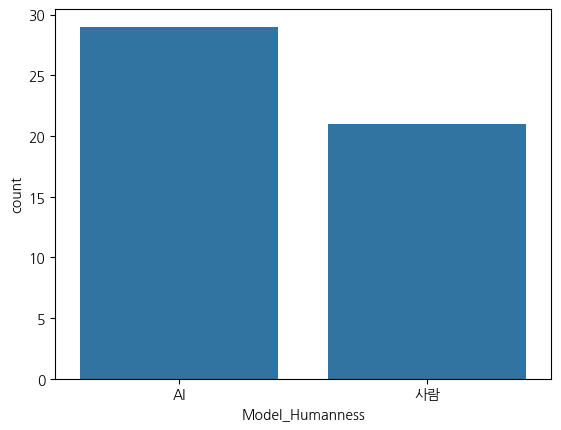

In [92]:
sns.countplot(data=excel_sheet, x="Model_Humanness")

<Axes: xlabel='AI_Like', ylabel='count'>

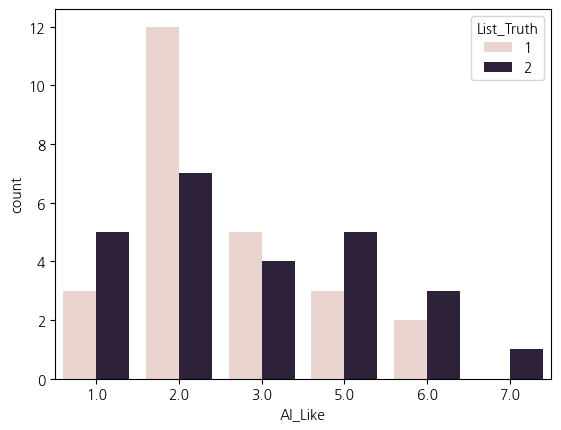

In [93]:
# List 1: AI라고 속인 경우, List 2: 사람이라고 밝힌 경우,

sns.countplot(data=excel_sheet, x="AI_Like", hue="List_Truth")

<Axes: xlabel='Human_Like', ylabel='count'>

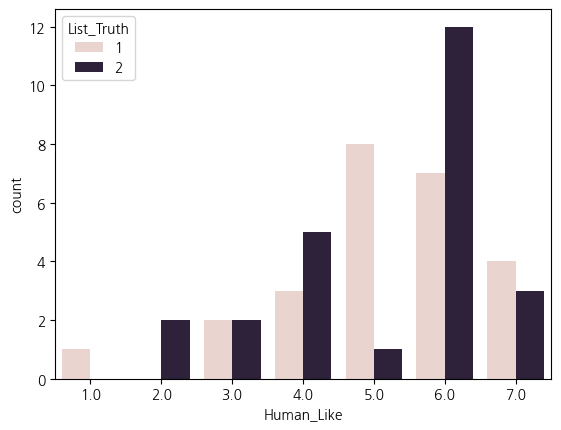

In [94]:
sns.countplot(data=excel_sheet, x="Human_Like", hue="List_Truth")

In [95]:
excel_sheet.describe()

,Timestamp,AI_Like,Human_Like,List_Truth,Analysis_Target,Correctness_Humanness_Perception
count,50,50.000000,50.000000,50.000000,50.0,50.000000
mean,2025-04-26 19:18:04.247240192,3.000000,5.140000,1.500000,1.0,0.840000
min,2025-04-03 15:07:08.523000,1.000000,1.000000,1.000000,1.0,0.000000
25%,2025-04-08 14:42:36.148999936,2.000000,4.000000,1.000000,1.0,1.000000
50%,2025-04-15 05:26:29.231500032,2.000000,6.000000,1.500000,1.0,1.000000
75%,2025-05-11 22:41:47.183000064,5.000000,6.000000,2.000000,1.0,1.000000
max,2025-07-16 11:38:43.325000,7.000000,7.000000,2.000000,1.0,1.000000
std,NaN,1.714286,1.457003,0.505076,0.0,0.370328


In [96]:
excel_sheet.groupby(['List_Truth', 'Participant_Gender'])['AI_Like'].mean()

List_Truth  Participant_Gender
1           남                     3.000000
            여                     2.538462
2           남                     3.000000
            여                     3.461538
Name: AI_Like, dtype: float64

In [97]:
excel_sheet.groupby(['List_Truth', 'Participant_Gender'])['Human_Like'].mean()

List_Truth  Participant_Gender
1           남                     4.750000
            여                     5.538462
2           남                     5.000000
            여                     5.230769
Name: Human_Like, dtype: float64

In [ ]:
# 이원분산분석을 위한 선형모델 생성
model = sm.OLS.from_formula('Human_Like ~ C(List_Truth) + C(Participant_Gender) + C(List_Truth):C(Participant_Gender)', data=excel_sheet)
results = model.fit()

# 이원분산분석 결과
anova_table = anova_lm(results, typ=2)
print("이원분산분석 결과:")
print(anova_table)

# 상호작용 효과 확인
print(f"\n상호작용 효과 p-value: {anova_table.loc['C(List_Truth):C(Participant_Gender)', 'PR(>F)']:.3f}")

이원분산분석 결과:
                                        sum_sq    df         F    PR(>F)
C(List_Truth)                         0.020000   1.0  0.009220  0.923923
C(Participant_Gender)                 3.241154   1.0  1.494091  0.227809
C(List_Truth):C(Participant_Gender)   0.970385   1.0  0.447323  0.506952
Residual                             99.788462  46.0       NaN       NaN

상호작용 효과 p-value: 0.507


In [107]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# 이원분산분석을 위한 선형모델 생성
model = sm.OLS.from_formula('AI_Like ~ C(List_Truth) + C(Participant_Gender) + C(List_Truth):C(Participant_Gender)', data=excel_sheet)
results = model.fit()

# 이원분산분석 결과
anova_table = anova_lm(results, typ=2)
print("이원분산분석 결과:")
print(anova_table)

# 상호작용 효과 확인
print(f"\n상호작용 효과 p-value: {anova_table.loc['C(List_Truth):C(Participant_Gender)', 'PR(>F)']:.3f}")

이원분산분석 결과:
                                           sum_sq    df             F  \
C(List_Truth)                        2.880000e+00   1.0  9.568000e-01   
C(Participant_Gender)                1.754961e-33   1.0  5.830371e-34   
C(List_Truth):C(Participant_Gender)  2.658462e+00   1.0  8.832000e-01   
Residual                             1.384615e+02  46.0           NaN   

                                       PR(>F)  
C(List_Truth)                        0.333111  
C(Participant_Gender)                1.000000  
C(List_Truth):C(Participant_Gender)  0.352236  
Residual                                  NaN  

상호작용 효과 p-value: 0.352


In [66]:
excel_sheet

,Timestamp,Participant_id,Model_Humanness,AI-Like,Human-Like,List_Truth,Participant_Gender,Analysis_Target,Correctness_Humanness_Perception
0,2025-04-03 15:07:08.523,LY019,AI,6.0,4.0,1,남,1,1
1,2025-04-03 18:24:22.639,LY011,사람,5.0,5.0,2,여,1,1
2,2025-04-03 19:58:42.765,LY007,AI,3.0,5.0,1,남,1,1
3,2025-04-04 11:27:51.271,LY022,사람,1.0,6.0,2,여,1,1
4,2025-04-04 14:03:22.407,LY002,AI,2.0,6.0,1,여,1,1
5,2025-04-04 16:52:44.372,LY017,사람,2.0,6.0,2,남,1,1
6,2025-04-04 17:58:52.050,LY013,AI,6.0,4.0,1,여,1,1
7,2025-04-04 19:32:51.758,LY006,AI,3.0,6.0,2,남,1,0
8,2025-04-07 15:47:47.610,LY004,사람,3.0,6.0,2,여,1,1
9,2025-04-07 19:41:31.165,LY025,AI,3.0,5.0,1,여,1,1


# Survey - AI Emotion Perception

In [ ]:
excel_path = os.path.resolve
excel_path = os.path.join(Path.cwd(), '../../', 'data', 'AI-emotion-perception', 'AI-Emotion-Perception-Survey-Responses.xlsx')
excel_file = pd.ExcelFile(excel_path)
excel_file.sheet_names

FileNotFoundError: [Errno 2] No such file or directory: '/Users/bagjuhyeon/Documents/WorkSpace/phoneticConvergence/src/analysis/../../data/AI-emotion-perception/AI-Emotion-Perception-Survey-Responses.xlsx'

PosixPath('/Users/bagjuhyeon/Documents/WorkSpace/phoneticConvergence/src/analysis')

In [ ]:
excel_sheet = excel_file.parse(sheet_name='설문지 응답 시트')
excel_sheet.info()